# Further usecases 

## Matplotlib an manim combined

In [14]:
from manim import *
import matplotlib.pyplot as plt

param   = "-v WARNING -s -ql --disable_caching --progress_bar None Example"
paramH  = "-v WARNING -s -qh --disable_caching --progress_bar None Example"
paramp  = "-v WARNING    -ql --disable_caching --progress_bar None Example"
parampH = "-v WARNING    -qh --disable_caching --progress_bar None Example"

In [15]:
%%manim $paramp

plt.rcParams['figure.dpi'] = 100

def my_function(amplitude, x):
    return amplitude * np.sin(x)

def mpl_image_plt(amplitude, x):
    fig, ax = plt.subplots()
    ax.plot(x, my_function(amplitude, x))
    ax.set_ylim(-1, 1)
    fig.canvas.draw()
    img = ImageMobject(fig.canvas.buffer_rgba()).scale(2)
    plt.close(fig)
    return img

class Example(Scene):
    def construct(self):
        self.camera.background_color=WHITE
        x_values = np.linspace(0, 30, 400)
        amp1 = 0.5
        amp2 = 1
        tr_amplitude = ValueTracker(amp1)
        image = mpl_image_plt(amp1, x_values)
        self.add(image)

        def update_image(mob):
            new_mob = mpl_image_plt(tr_amplitude.get_value(), x_values)
            mob.become(new_mob)

        image.add_updater(update_image)
        self.play(tr_amplitude.animate.set_value(amp2), run_time=3)


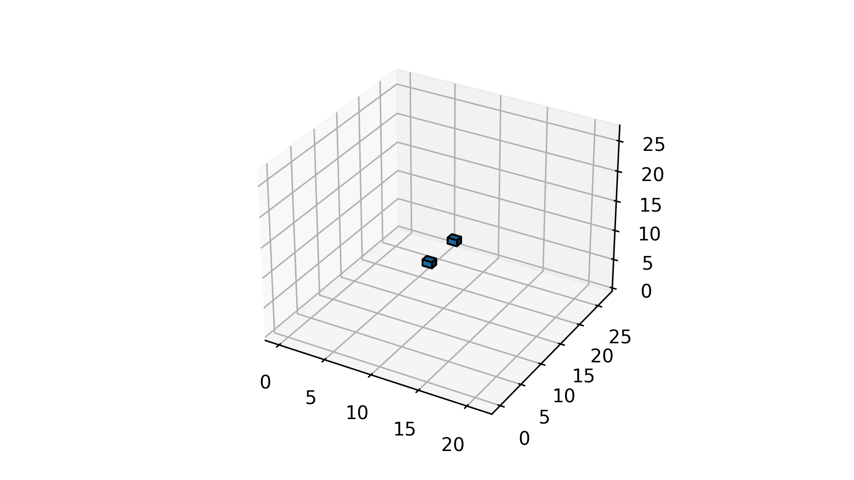

In [16]:
%%manim $paramp

plt.rcParams['figure.dpi'] = 300

class Example(Scene):
    def construct(self):
        self.camera.background_color= WHITE
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')
        x=np.full((21,27,27),0)
        x[10,10,10]=1
        x[10,16,10]=1
        ax.voxels(x, edgecolor='k')
        fig.canvas.draw()
        buf = fig.canvas.buffer_rgba()
        img = ImageMobject(buf).scale(1)
        plt.close(fig)
        self.add(img)